In [ ]:
! pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=ce3b1470ddbb8b991011f26b051d312aaf0ed169d80e6cd6d9cf6450ab85f900
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


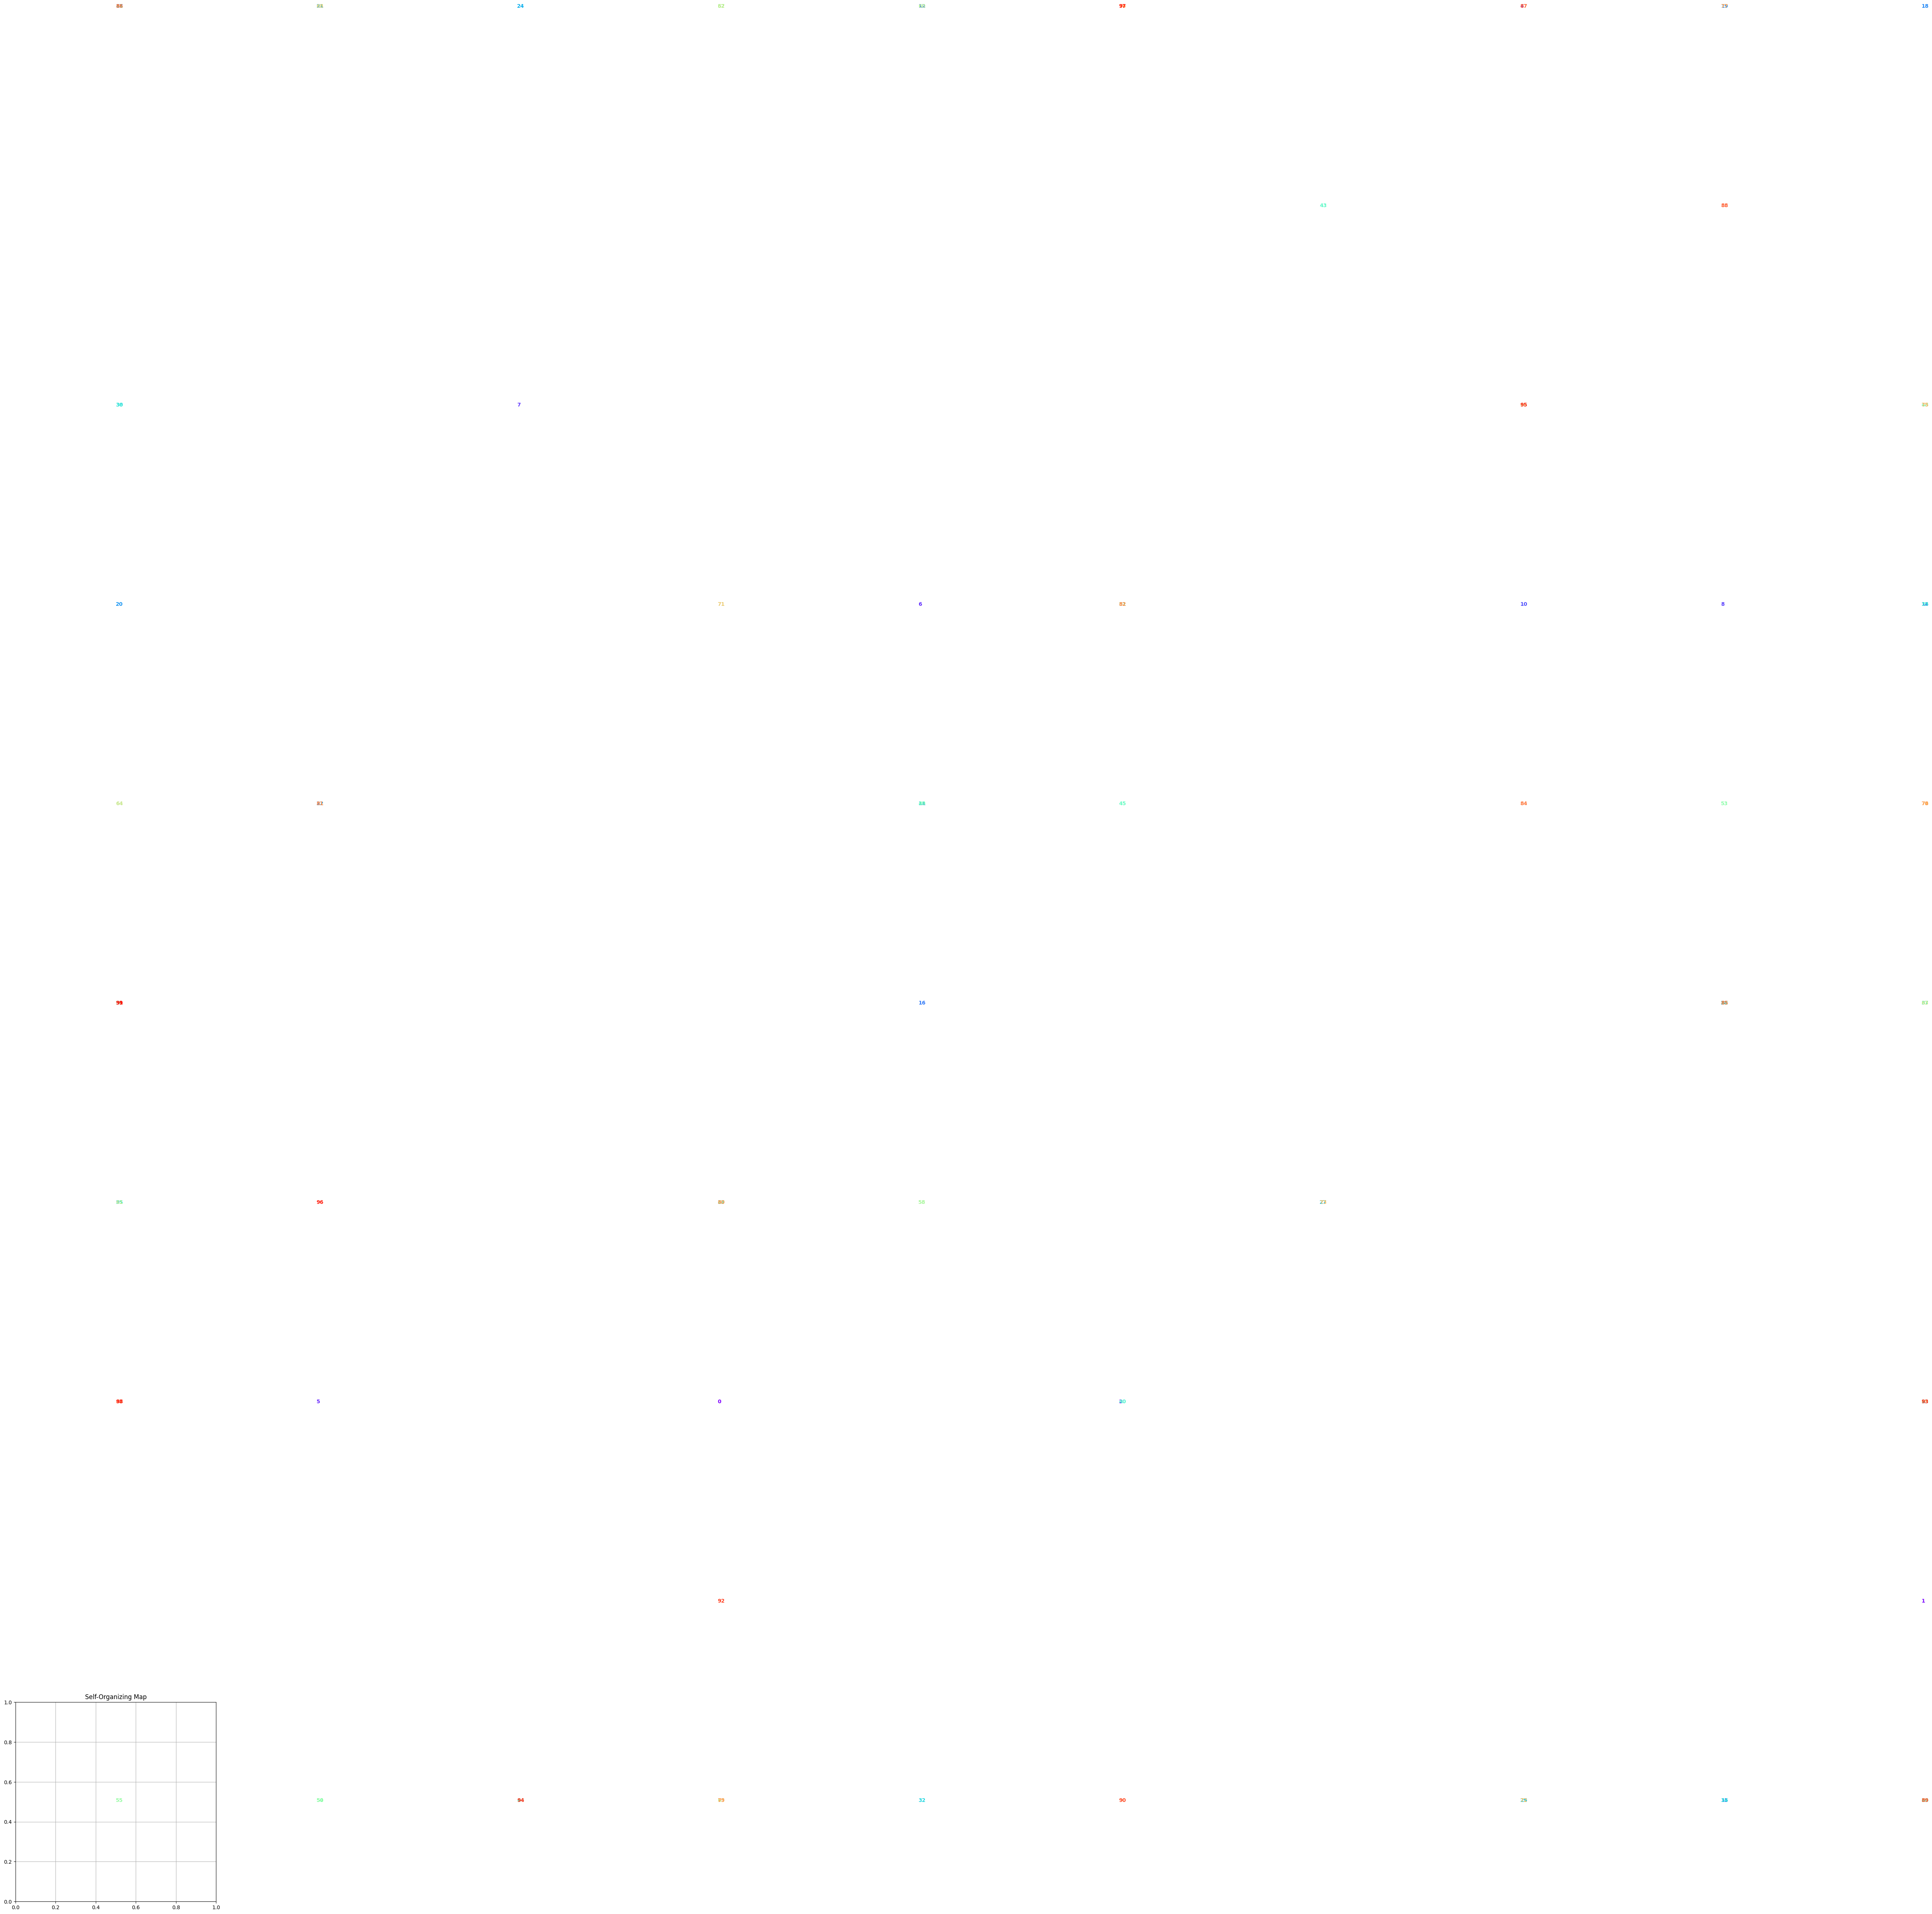

In [ ]:
# Import necessary libraries
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Generate some random data for demonstration
# For example, let's generate 100 2D points
data = np.random.rand(100, 2)

# Initialize the SOM
# x and y define the grid size of SOM, input_len is the dimensionality of the data
som = MiniSom(x=10, y=10, input_len=2, sigma=3.0, learning_rate=0.5)

# Randomly initialize the weights
som.random_weights_init(data)

# Train the SOM
som.train_random(data, num_iteration=100)

# Plot the SOM grid with the input data
plt.figure(figsize=(7, 7))
for i, (x, y) in enumerate(data):
    # Get the winning node
    w = som.winner([x, y])
    # Plot the data point and its corresponding winner
    plt.text(w[0] + .5, w[1] + .5, str(i), color=plt.cm.rainbow(i / len(data)),
             fontdict={'size': 10, 'weight': 'bold'})

plt.title('Self-Organizing Map')
plt.grid(True)
plt.show()


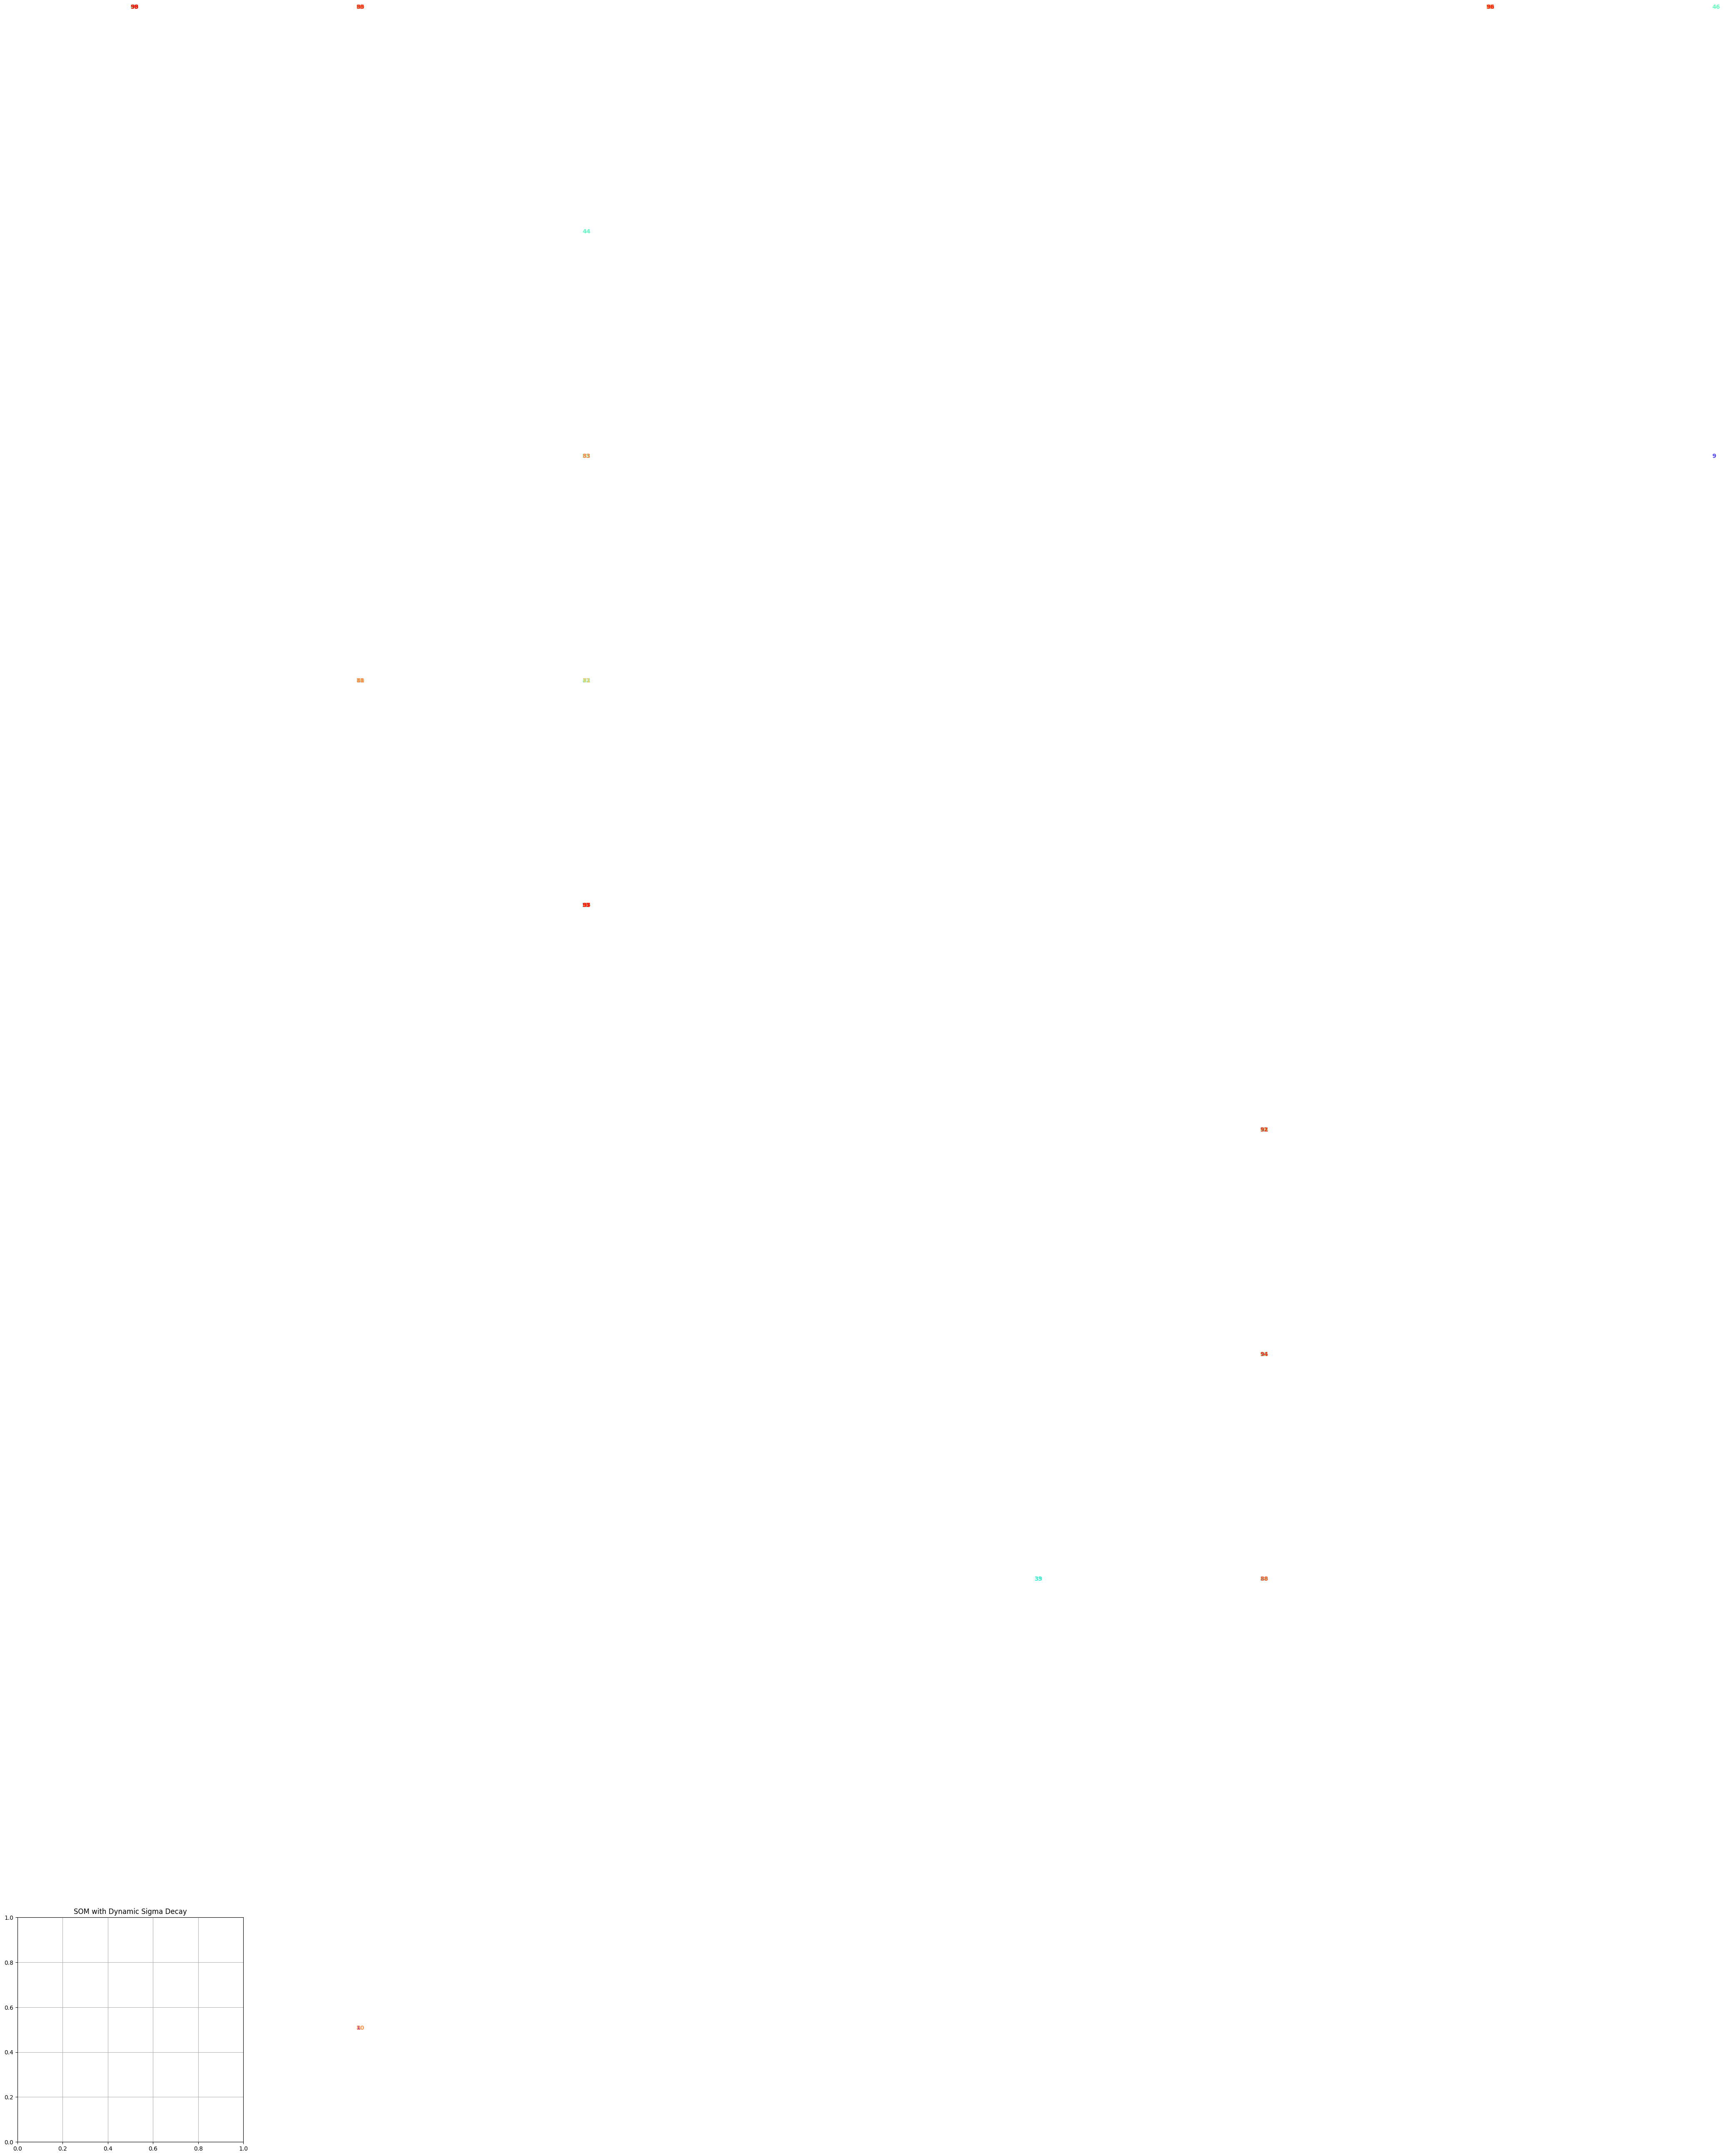

In [ ]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Generate random data
data = np.random.rand(100, 2)

# Initialize the SOM with larger sigma for broad learning
som = MiniSom(x=10, y=10, input_len=2, sigma=3.0, learning_rate=0.5)
som.random_weights_init(data)

# Define a function to decay sigma over time
def decay_sigma(initial_sigma, iteration, total_iterations):
    return initial_sigma * np.exp(-iteration / total_iterations)

# Training parameters
initial_sigma = 3.0  # Starting value of sigma
num_iterations = 100

# Train with dynamically adjusted sigma
for i in range(num_iterations):
    # Update sigma dynamically using a decay function
    current_sigma = decay_sigma(initial_sigma, i, num_iterations)

    # Train the SOM with one random sample at each iteration
    som.sigma = current_sigma  # Dynamically update sigma
    som.update(data[np.random.randint(0, data.shape[0])], som.winner(data[np.random.randint(0, data.shape[0])]), i, num_iterations)

# Visualize the result
plt.figure(figsize=(7, 7))
for i, (x, y) in enumerate(data):
    w = som.winner([x, y])
    plt.text(w[0] + .5, w[1] + .5, str(i), color=plt.cm.rainbow(i / len(data)),
             fontdict={'size': 10, 'weight': 'bold'})

plt.title('SOM with Dynamic Sigma Decay')
plt.grid(True)
plt.show()
